In [1]:
# 导入各种包
import pandas as pd
%pylab
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import re

sns.set()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("D:/anydata/data/microwave.tsv", sep='\t') # 读取tsv格式数据
df.head()#显示前5行

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,8/31/2015
1,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,8/31/2015
2,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",8/31/2015
3,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",8/31/2015
4,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,8/31/2015


In [3]:
df.info() # 查看数据缺省情况，很好，没有缺省值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 15 columns):
marketplace          1615 non-null object
customer_id          1615 non-null int64
review_id            1615 non-null object
product_id           1615 non-null object
product_parent       1615 non-null int64
product_title        1615 non-null object
product_category     1615 non-null object
star_rating          1615 non-null int64
helpful_votes        1615 non-null int64
total_votes          1615 non-null int64
vine                 1615 non-null object
verified_purchase    1615 non-null object
review_headline      1615 non-null object
review_body          1615 non-null object
review_date          1615 non-null object
dtypes: int64(5), object(10)
memory usage: 189.4+ KB


# 问题一
分析星级、评论以及帮助等级

In [4]:
'''
文本处理
1.将标题和主体合并得到评论（review）
2.去掉符号
3.分割得到词汇并转换成小写
4.去掉停词
'''
#停词表
stopwords_list = [line.rstrip() for line in open('D:/anydata/data/baidu_stopword.txt')]

def clean_text(text):
    try:
        text = BeautifulSoup(str(text), 'html.parser').get_text() # 去掉网页标签
    except:
        print(txt)
    else:
        pass
    
    text = re.sub(r'[^a-zA-Z]', ' ', text) # 利用正则表达式去掉标点
    words=text.lower().split() # 小写并且分割成单词
    
    words=[w for w in words if w not in stopwords_list] # 去掉停词
    return ' '.join(words) # 返回字符串

df["review"] = df.review_headline + " " + df.review_body# 清洗
df['review'] = df.review.apply(clean_text) # 清洗

## 星级
将星级分成三部分，积极，中立和消极，分别看出现的高频词汇和品牌

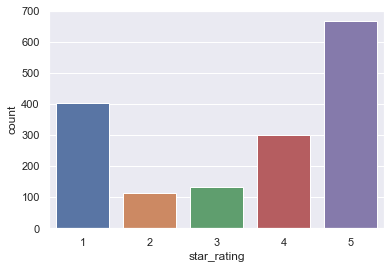

In [5]:
# 星级分布
sns.countplot(x=df["star_rating"], data = df)


In [6]:
#将星级分成几部分(1:好评, 0:中评, -1:差评)
df.loc[df['star_rating'] < 3, 'star_sentiment'] = -1
df.loc[df['star_rating'] == 3, 'star_sentiment'] = 0
df.loc[df['star_rating'] > 3, 'star_sentiment'] = 1

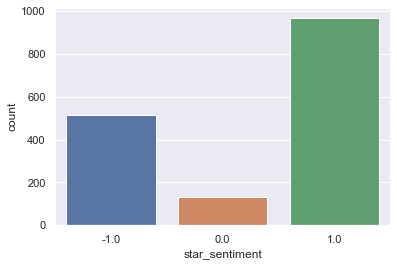

In [7]:
sns.countplot(x=df["star_sentiment"], data = df)
# 可以看出好评占多数

In [8]:
def getTxt(ss):
    '''ss是包含字符串的数组，返回一个字符串'''
    txt = ""
    for i in range(len(ss)):
        txt += ss[i]
    return txt

def countWord(txt, num=20):
    '''txt:一个长的字符串，返回前20个高频词汇'''
    txtArr = txt.split()
    counts = {}
    for word in txtArr:
        counts[word] = counts.get(word, 0) + 1

    countsList = list(counts.items())
    countsList.sort(key=lambda x:x[1], reverse=True)#按次数从大到小排序

    '''打印
    for i in range(20):
        word, count = countsList[i]
        print('{0:<10}{1:>5}'.format(word,count))
    '''
    return countsList[:num]

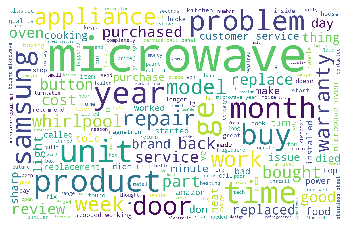

In [9]:
# 星级低的高频词汇
from wordcloud import WordCloud
txt = getTxt(df.loc[df['star_sentiment'] == -1, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)

plt.imshow(wordcloud)
plt.axis("off")
# 打印前20个词
star_negative_word = countWord(txt)

star_negative_title = df.loc[df['star_sentiment'] == -1, 'product_title'].value_counts()[:10]

In [10]:
pd.DataFrame(star_negative_word)

,0,1
0,microwave,822
1,ge,237
2,service,231
3,door,215
4,unit,204
5,buy,198
6,years,188
7,months,176
8,samsung,173
9,time,168


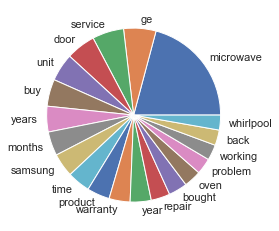

In [11]:
star_negative_word = np.array(star_negative_word)
plt.pie(x = star_negative_word[:, 1], labels = star_negative_word[:, 0])
plt.show()

In [12]:
pd.DataFrame(star_negative_title).index

Index(['danby 0.7 cu.ft. countertop microwave',
       'samsung smh1816s 1.8 cu. ft. stainless steel over-the-range microwave',
       'pem31smss ge profile spacemaker countertop microwave oven stainless steel',
       'sharp microwave drawer oven',
       'whirlpool gh7208xrs gold 2.0 cu. ft. stainless steel over-the-range microwave',
       'frigidaire ffmv164l 1.6 cubic foot over-the-range microwave with fits-more capacity, 1,550 watts and,',
       'whirlpool gmh5205xvs 2.0 cu. ft. over-the-range microwave oven 300 cfm - stainless steel',
       'profile 2.2 cu. ft. countertop microwave w/child lockout and extra large',
       'ge profile pvm1790 stainless steel over-the-range microwave oven',
       'whirlpool wmc20005yb 0.5 cu. ft. black countertop microwave'],
      dtype='object')

In [13]:
pd.DataFrame(star_negative_title)

,product_title
danby 0.7 cu.ft. countertop microwave,68
samsung smh1816s 1.8 cu. ft. stainless steel over-the-range microwave,64
pem31smss ge profile spacemaker countertop microwave oven stainless steel,27
sharp microwave drawer oven,24
whirlpool gh7208xrs gold 2.0 cu. ft. stainless steel over-the-range microwave,22
"frigidaire ffmv164l 1.6 cubic foot over-the-range microwave with fits-more capacity, 1,550 watts and,",21
whirlpool gmh5205xvs 2.0 cu. ft. over-the-range microwave oven 300 cfm - stainless steel,21
profile 2.2 cu. ft. countertop microwave w/child lockout and extra large,19
ge profile pvm1790 stainless steel over-the-range microwave oven,18
whirlpool wmc20005yb 0.5 cu. ft. black countertop microwave,18


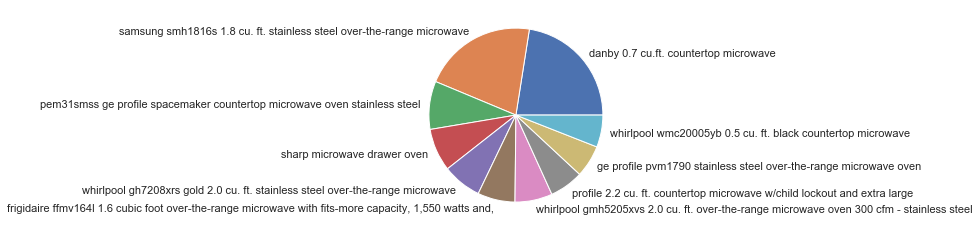

In [14]:
plt.pie(x = star_negative_title, labels = pd.DataFrame(star_negative_title).index)
plt.show()

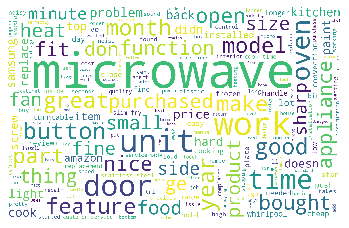

In [15]:
# 星级中等的
txt = getTxt(df.loc[df['star_sentiment'] == 0, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)

plt.imshow(wordcloud)
plt.axis("off")

# 取20个词
star_neutral_word = countWord(txt)
star_neutral_title = df.loc[df['star_sentiment'] == 0, 'product_title'].value_counts()[:10]

In [16]:
pd.DataFrame(star_neutral_word)

,0,1
0,microwave,190
1,unit,60
2,door,53
3,oven,50
4,time,46
5,works,36
6,good,30
7,great,29
8,work,28
9,model,27


In [17]:
pd.DataFrame(star_neutral_title)

,product_title
danby 0.7 cu.ft. countertop microwave,41
sharp 950-watt 1-2/5-cubic-foot over-the-range microwaves,8
pem31smss ge profile spacemaker countertop microwave oven stainless steel,7
"samsung mc11h6033ct countertop convection microwave with 1.1 cu. ft. capacity, slim fry technology, grilling element, ceramic enamel interior, drop down door, and eco mode in stainless steel",6
"whirlpool wmc20005yw countertop microwave, 0.5 cu. ft., white",4
sharp 1.1-cubic-foot 850-watt over-the-range convection microwaves,4
"whirlpool stainless look countertop microwave, 0.5 cu. feet, wmc20005yd",4
samsung smh1816s 1.8 cu. ft. stainless steel over-the-range microwave,4
microwave cavity paint 98qbp0302,3
profile 2.2 cu. ft. countertop microwave w/child lockout and extra large,3


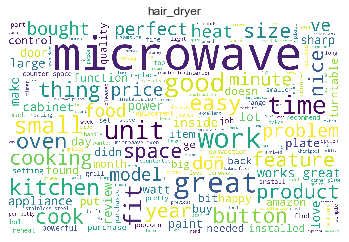

In [18]:
# 星级高的
txt = getTxt(df.loc[df['star_sentiment'] == 1, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.title("hair_dryer")
plt.imshow(wordcloud)
plt.axis("off")
# 前20个词
star_positive_word = countWord(txt)
star_positive_title = df.loc[df['star_sentiment'] == 1, 'product_title'].value_counts()[:10]

In [19]:
pd.DataFrame(star_positive_word)

,0,1
0,microwave,1221
1,great,373
2,works,261
3,good,222
4,small,220
5,oven,207
6,easy,206
7,space,205
8,unit,186
9,kitchen,175


In [20]:
pd.DataFrame(star_positive_title)

,product_title
danby 0.7 cu.ft. countertop microwave,285
microwave cavity paint 98qbp0302,66
"whirlpool wmc20005yw countertop microwave, 0.5 cu. ft., white",63
"whirlpool stainless look countertop microwave, 0.5 cu. feet, wmc20005yd",59
whirlpool wmc20005yb 0.5 cu. ft. black countertop microwave,59
sharp microwave drawer oven,45
sharp 950-watt 1-2/5-cubic-foot over-the-range microwaves,34
samsung counter top microwave,32
sharp 1.1-cubic-foot 850-watt over-the-range convection microwaves,29
ge microwave oven magnetron and diode kit om75p (10) part # wb27x10017,29


### 评论
将评论分成三部分，积极，中立和消极，分别看出现的高频词汇和品牌

In [21]:
# 用textblob分析文本极性
from textblob import TextBlob 

def get_sentiment(text): 
    ''' 
    调用TextBlob，返回-1 or  0 or  1
    '''
    analysis = TextBlob(text) 
    return np.sign(analysis.sentiment.polarity)

df['review_sentiment'] = df.review.apply(get_sentiment) # 调用函数

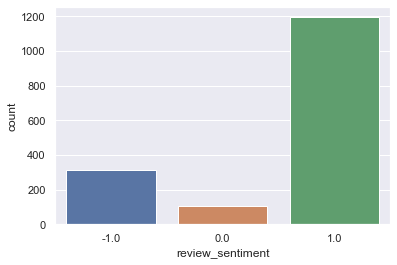

In [22]:
# 分布
sns.countplot(x=df["review_sentiment"], data = df)

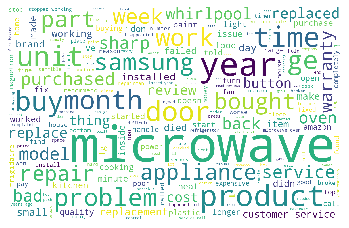

In [23]:
# 评论消极的
txt = getTxt(df.loc[df['review_sentiment'] == -1, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")

review_negative_word = countWord(txt)
review_negative_title = df.loc[df['review_sentiment'] == -1, 'product_title'].value_counts()[:10]

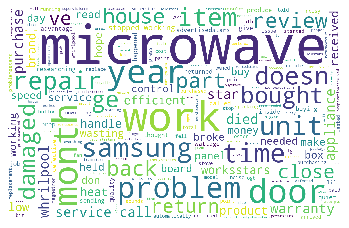

In [24]:
# 评论中立的
txt = getTxt(df.loc[df['review_sentiment'] == 0, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")

review_neutral_word = countWord(txt)
review_neutral_title = df.loc[df['review_sentiment'] == 0, 'product_title'].value_counts()[:10]

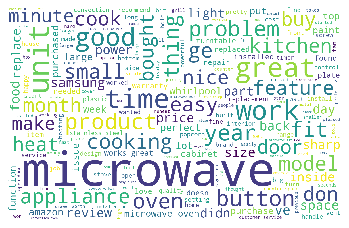

In [25]:
# 评论积极的
txt = getTxt(df.loc[df['review_sentiment'] == 1, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")

review_positive_word = countWord(txt)
review_positive_title = df.loc[df['review_sentiment'] == 1, 'product_title'].value_counts()[:10]

# 帮助等级
将帮助等级分成两部分，有用和没用，分别看出现的高频词汇和品牌

In [26]:
# 帮助等级分成有用和没用
df.loc[df['helpful_votes'] == 0, 'helpful_votes'] = 0
df.loc[df['helpful_votes'] > 0, 'helpful_votes'] = 1

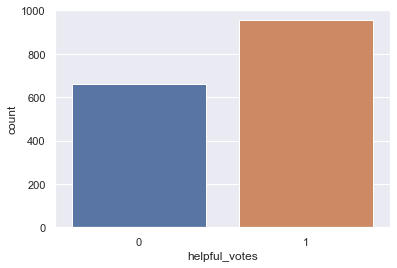

In [27]:
sns.countplot(x="helpful_votes", data = df)

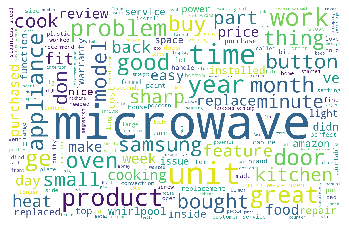

In [28]:
# 帮助有用的
txt = getTxt(df.loc[df['helpful_votes'] == 1, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")

helpful_word = countWord(txt)
helpful_title = df.loc[df['helpful_votes'] == 1, 'product_title'].value_counts()[:10]

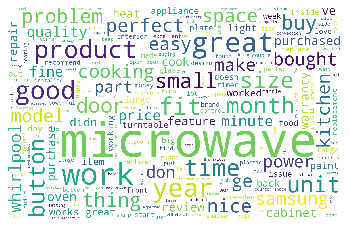

In [29]:
# 帮助没用的
txt = getTxt(df.loc[df['helpful_votes'] == 0, 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file("unhelpful.png") # 保存
# 打印前20个词
unhelpful_word = countWord(txt)
unhelpful_title = df.loc[df['helpful_votes'] == 0, 'product_title'].value_counts()[:10]

## 综合上面的来看
分析星级，评论，帮助等级得到了一些高频词汇和前十的品牌，整理如下：

# 第二问

### a)根据评级(rating)和评论评论(review)来确定最能提供信息的数据度量，使得阳光公司跟踪，一旦他们的三种产品在网上市场销售的话。

    最有信息含量的， 从两方面考虑，一个是该用户的满意程度， 另一个是该用户产生的影响
- 用户的满意程度
    根据(星级,评论)三个标准判断用户的满意程度.星级分1-5分,划分成-1, 0, 1; 评论分-1, 0, 1;如何描述用户满不满意呢?总的来说,星级越高,帮助等级越高,评分越高,用户越满意;可以给出一个满意程度的模型,比如简单的将前面两个的得分加起来(暂时没想到什么好方法, 具体可能要知道textblob的具体原理)
    
- 该用户产生的影响
由于帮助程度会产生马太效应，误差很大，因此使用提及属性比率


In [30]:
def make_data():
    data = []
    label = []
    for day in set(df.review_date.values):
        positive_star_num = sum(df.loc[df['review_date'] == day, 'star_sentiment'] >=0 )
        negative_star_num = sum(df.loc[df['review_date'] == day, 'star_sentiment'] < 0 )
        positive_review_num = sum(df.loc[df['review_date'] == day, 'review_sentiment'] >= 0 )
        negative_review_num = sum(df.loc[df['review_date'] == day, 'review_sentiment'] < 0 )
                              
        data.append([positive_star_num, negative_star_num, positive_review_num, negative_review_num])
        label.append(sum(df['review_date'] == day))
    return np.array(data), np.array(label)


In [31]:
data, label =  make_data()

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train , y_test = train_test_split(data, label)

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lr.intercept_

-2.220446049250313e-16

In [35]:
lr.coef_ # ...怎么都是0.5, 

array([0.5, 0.5, 0.5, 0.5])

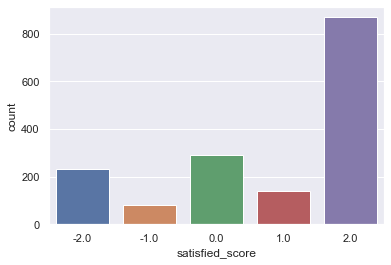

In [36]:
# 用户的满意程度
df['satisfied_score'] = df['star_sentiment'] + df['review_sentiment']

sns.countplot(x=df["satisfied_score"], data = df)

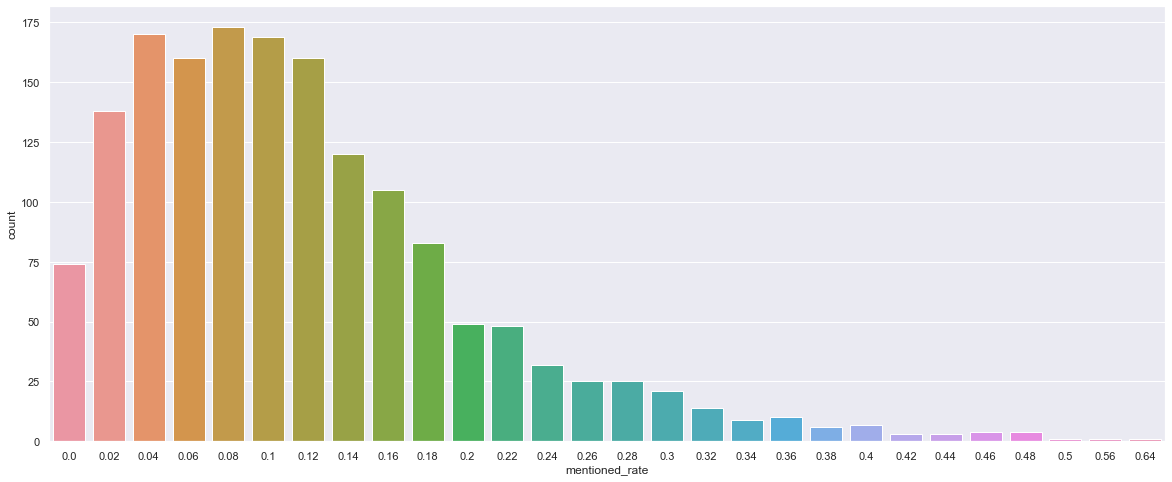

In [37]:
# 用户产生的影响
#获取所有评论中的高频词汇
txt = getTxt(df.review.values)
all_word = countWord(txt, num=50)

word_Arr = np.array(all_word)[:, 0]

def get_mentioned_rate(ss):bbbbb 
    word_set = set(ss.split())
    res = 0
    for word in word_set:
        if word in word_Arr:
            res += 1
    return res / len(word_Arr)
    
df["mentioned_rate"] = df.review.apply(get_mentioned_rate)

plt.figure(figsize=(20, 8))
sns.countplot(x="mentioned_rate", data=df)

In [38]:
df["review_len"] = df.review.apply(lambda ss: len(ss.split()))

### b)基于那些“能预测或暗示产品在市场上声誉增加或减少的”数据，来分析讨论“基于时间的度量方法(measures)和模式(patterns)”；
	从时间来看产品的声誉变化, 这里的数据有十多年,选择的时间段应该是月份或者年份.从第一问得到用户的满意程度,观察满意程度随时间变化即可.横坐标:时间(单位:年/月份);纵坐标:满意程度(单位:1)

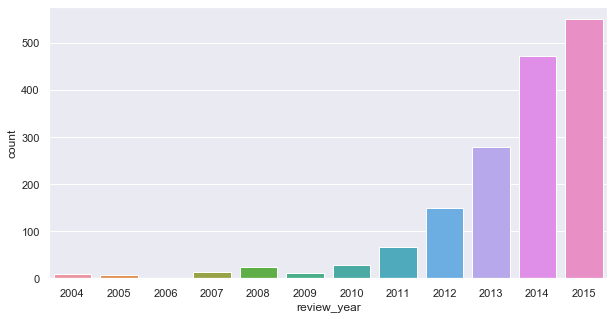

In [39]:
#按年份排列
df['review_year'] = pd.to_datetime(df.review_date).dt.strftime("%Y")
df.sort_values("review_year",inplace=True)
# 销量
plt.figure(figsize=(10,5))
sns.countplot(x="review_year", data=df)

<BarContainer object of 12 artists>

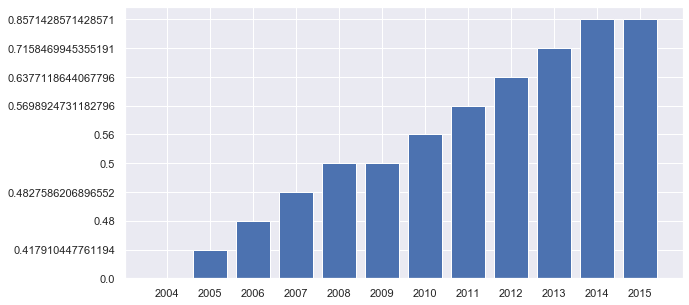

In [40]:
reputation_list = []
for year in set(df['review_year'].values):
    positive_number = np.sum(df.loc[df['review_year'] == year, 'satisfied_score'] > 0)
    rate = positive_number / sum(df['review_year'] == year)
    reputation_list.append([year, rate])
reputation_list = np.array(reputation_list)
reputation_list.sort(axis = 0) # 将年份排列

plt.figure(figsize=(10 ,5))
plt.bar(reputation_list[:,0], reputation_list[:,1])
# 可以看到声誉一直在增长

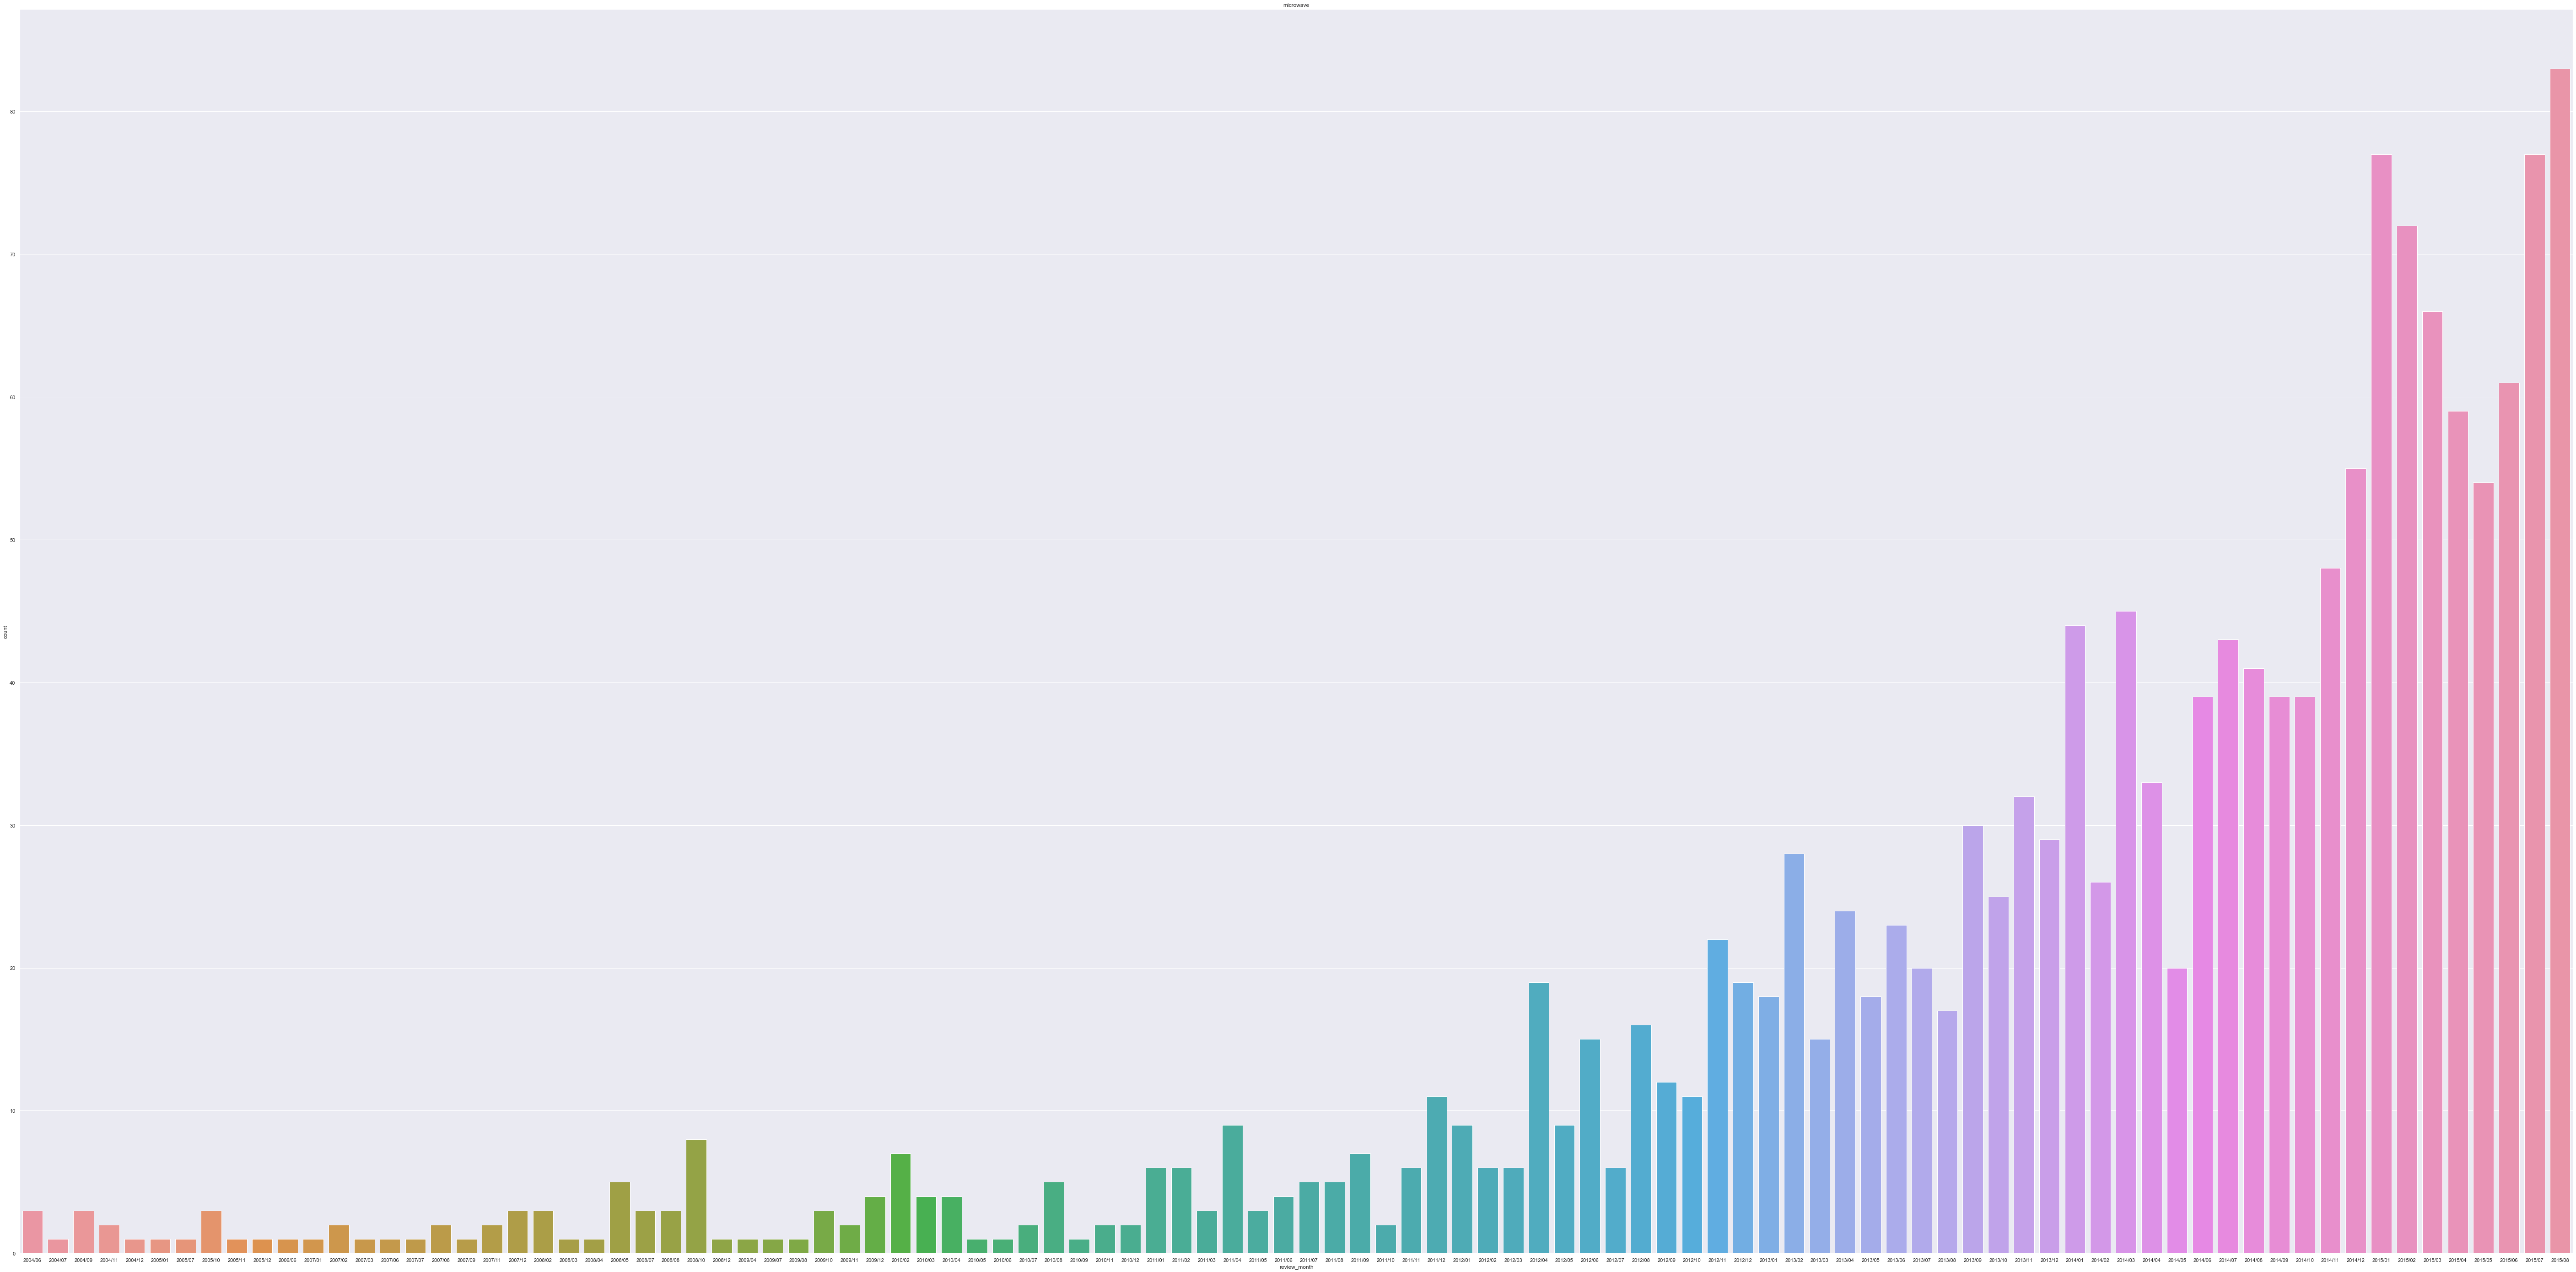

In [68]:
#按月份排列
df['review_month'] = pd.to_datetime(df.review_date).dt.strftime("%Y/%m")
df.sort_values("review_month",inplace=True)
# 销量
plt.figure(figsize=(100,50))
plt.title("microwave")
sns.countplot(x="review_month", data=df)

<BarContainer object of 100 artists>

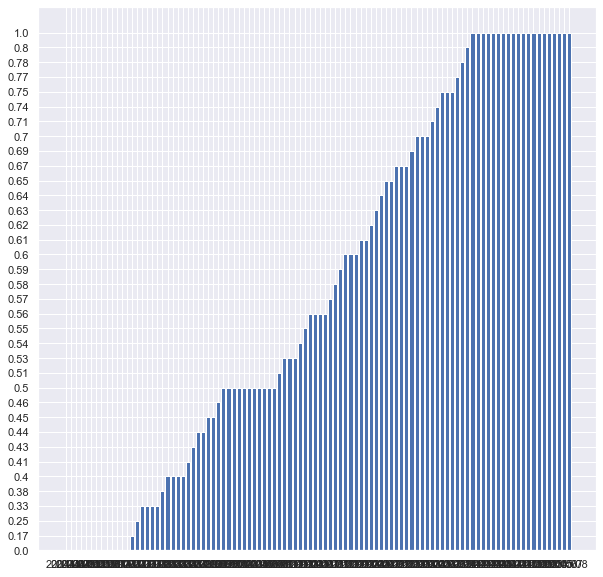

In [42]:
reputation_list = []
for month in set(df['review_month'].values):
    positive_number =m n np.sum(df.loc[df['review_month'] == month, 'satisfied_score'] > 0)
    rate = positive_number / sum(
        df['review_month'] == month)
    rate = np.round(rate, 2)
    reputation_list.append([month, rate])
reputation_list = np.array(reputation_list)
reputation_list.sort(axis = 0) # 将年份排列

plt.figure(figsize=(10 ,10))
plt.bar(reputation_list[:,0], reputation_list[:,1])
# 可以看到声誉一直在增长

### c)以寻找一个“暗示或预示产品的成功或失败的”**潜在性**的方法为目的，确定一套“基于文本(text-based)和评级(rating-based)的综合度量方法”；
	产品成败的潜在性的度量主要是看销量的增减趋势
    确定文本(text-based)和评级(rating-based)之间的最佳权重,来预测产品是否会成功.初步的想法是用这两个指标,通过决策树模型拟合,计算重要程度,把重要程度作为权重.产品成败的潜在性就看销量增加还是减少.

In [ ]:
# 选取销量变化剧烈的几个时间分析 2012/7-8 2012/11-12 2014/11-12

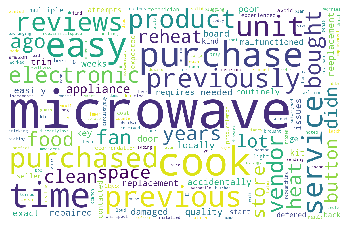

In [69]:

# 帮助没用的
txt = getTxt(df.loc[df['review_month'] == '2012/07', 'review'].values)
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(txt)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file("unhelpful.png") # 保存
# 打印前20个词
unhelpful_word = countWord(txt)
unhelpful_title = df.loc[df['helpful_votes'] == 0, 'product_title'].value_counts()[:10]


In [70]:
pd.DataFrame(unhelpful_word)

,0,1
0,microwave,8
1,purchase,3
2,cook,3
3,easy,3
4,time,3
5,service,2
6,previous,2
7,unit,2
8,purchased,2
9,previously,2


In [43]:
# 分析两者关联性
df[['mentioned_rate', 'helpful_votes', 'review_sentiment']].corr()

,mentioned_rate,helpful_votes,review_sentiment
mentioned_rate,1.000000,0.328772,0.033771
helpful_votes,0.328772,1.000000,-0.032734
review_sentiment,0.033771,-0.032734,1.000000


In [44]:
# 分析两者关联性
df[['star_sentiment', 'review_sentiment']].corr()

,star_sentiment,review_sentiment
star_sentiment,1.000000,0.484986
review_sentiment,0.484986,1.000000


### d)特定的星级是否会引起更多的评论？例如，客户看到一连串的差评，他是否会更倾向于写一个差评呢？
根据时间段, 分析星级对接下来的评论的影响.查看有连续差评的时间段中的评论分成一些小问题


In [45]:
# 连续好评




In [46]:
#连续差评

### e)特定质量的文本评论(text-based reviews)是否和评级(rating)有强关联性呢？例如，“对产品很满意！”，“对产品很失望！”
	特定文本是否与评级有很强的关联.看给出高评分的的用户的评论中的高频词汇.

In [71]:
positive_words = ['great', 'love', 'perfect', 'nice', 'awesome', 'excellent','excellent','excited']
negative_words = ['worst', 'disappointed', 'annoying', 'junk', 'sucks', 'frustating']

def is_positive(ss):
    for word in ss.split():
        if word in positive_words:
            return 1
    return 0

def is_negative(ss):
    for word in ss.split():
        if word in negative_words:
            return 1
    return 0

df['is_positive'] = df.review.apply(is_positive)
df['is_negative'] = df.review.apply(is_negative)

In [75]:
df[['star_rating', 'is_positive']].corr()

,star_rating,is_positive
star_rating,1.000000,0.447329
is_positive,0.447329,1.000000


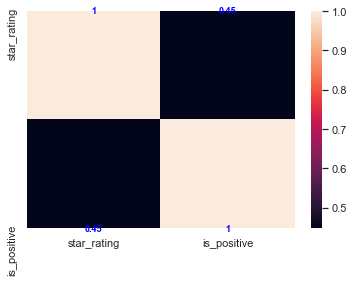

In [72]:
sns.heatmap(df[['star_rating', 'is_positive']].corr(), annot=True, annot_kws={'size':9,'weight':'bold', 'color':'blue'})

In [74]:
df[['star_rating', 'is_negative']].corr()

,star_rating,is_negative
star_rating,1.000000,-0.273808
is_negative,-0.273808,1.000000


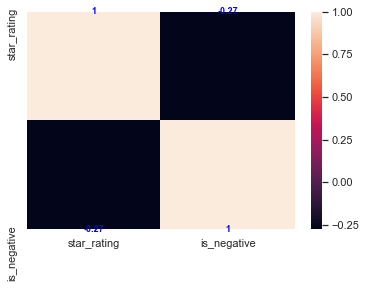

In [73]:
sns.heatmap(df[['star_rating', 'is_negative']].corr(), annot=True, annot_kws={'size':9,'weight':'bold', 'color':'blue'})

In [47]:
review_negative_word

[('microwave', 436),
 ('door', 121),
 ('buy', 118),
 ('years', 108),
 ('service', 107),
 ('ge', 106),
 ('product', 105),
 ('unit', 105),
 ('months', 96),
 ('year', 83),
 ('time', 82),
 ('warranty', 78),
 ('samsung', 76),
 ('bought', 69),
 ('repair', 62),
 ('working', 61),
 ('oven', 60),
 ('problem', 58),
 ('purchased', 57),
 ('sharp', 56)]

In [48]:
all_word # great,love

[('microwave', 2233),
 ('great', 457),
 ('unit', 450),
 ('door', 401),
 ('oven', 384),
 ('time', 380),
 ('works', 347),
 ('ge', 333),
 ('good', 332),
 ('product', 327),
 ('years', 311),
 ('service', 289),
 ('small', 276),
 ('buy', 273),
 ('bought', 254),
 ('kitchen', 252),
 ('cooking', 244),
 ('space', 241),
 ('months', 240),
 ('easy', 239),
 ('samsung', 227),
 ('model', 223),
 ('year', 211),
 ('problem', 208),
 ('don', 208),
 ('back', 206),
 ('button', 202),
 ('size', 194),
 ('food', 193),
 ('cook', 191),
 ('price', 182),
 ('warranty', 182),
 ('ve', 177),
 ('fit', 174),
 ('working', 173),
 ('nice', 172),
 ('sharp', 172),
 ('work', 172),
 ('counter', 168),
 ('open', 163),
 ('repair', 163),
 ('love', 159),
 ('whirlpool', 158),
 ('purchased', 157),
 ('reviews', 155),
 ('power', 154),
 ('heat', 153),
 ('top', 152),
 ('appliance', 152),
 ('replace', 149)]

In [49]:
# 星级和评论的相关系数
df[['review_sentiment', 'star_rating']].corr()

,review_sentiment,star_rating
review_sentiment,1.000000,0.494463
star_rating,0.494463,1.000000


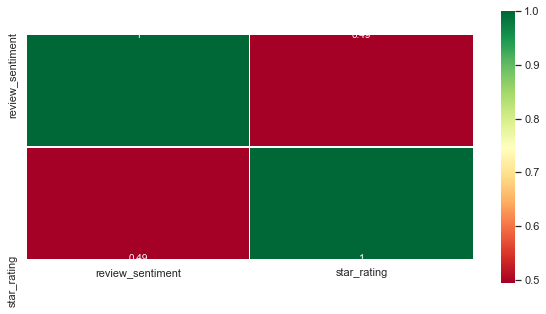

In [50]:
# 星级和评论的相关系数, 可视化看看
plt.figure(figsize=(10, 5))
sns.heatmap(df[['review_sentiment', 'star_rating']].corr(),linewidths=0.1,vmax=1.0,square=True, cmap='RdYlGn', linecolor='white',annot=True)
plt.show()

## 顾客id

In [51]:
# 这个人买了4次， 购买次数最多的之一。还每次都给了差评。。。这是多大的仇恨。。。
df[df.customer_id == 2567729]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_body,review_date,review,star_sentiment,review_sentiment,satisfied_score,mentioned_rate,review_len,review_year,review_month


In [52]:
def get_bought_times(id):
    global df
    return len(df[df.customer_id == id])

In [53]:
# 每个顾客的购买次数
df['bought_times'] = df.customer_id.apply(get_bought_times)

In [54]:
df['bought_times'].value_counts()

1    1611
4       4
Name: bought_times, dtype: int64

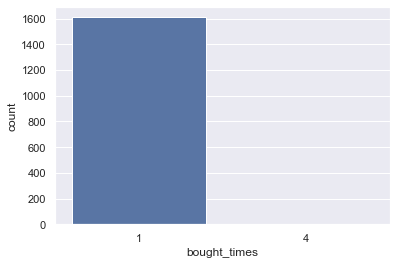

In [55]:
sns.countplot(x="bought_times", data = df)

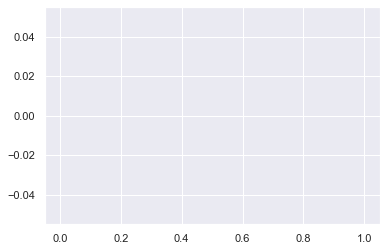

In [56]:
df.helpful_votes[df.helpful_votes > 100].hist() # 帮助点赞数大于100的分布，

In [57]:
df[['vine', 'helpful_votes']].corr() # 奇怪， 竟然相关性不高

,helpful_votes
helpful_votes,1.0


In [58]:
# 分析下是不是vine 对帮助等级影响大
df.loc[df['vine'] == 'Y', 'vine'] = 1
df.loc[df['vine'] == 'N', 'vine'] = 0

In [59]:
def getTxt(ss):
    '''ss是包含字符串的数组，返回一个字符串'''
    txt = ""
    for i in range(len(ss)):
        txt += ss[i]
    return txt

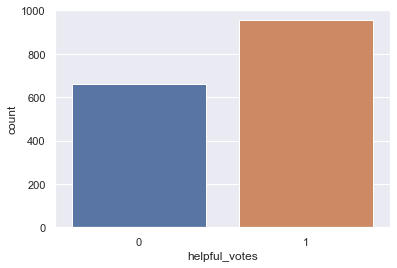

In [60]:
sns.countplot(x="helpful_votes", data = df)

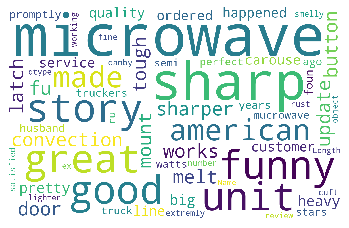

In [61]:
# 星级高的
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(str(df.loc[df['helpful_votes'] == 1, 'review']))
plt.imshow(wordcloud)
plt.axis("off")

wordcloud.to_file("hairdryer_helpful.png")

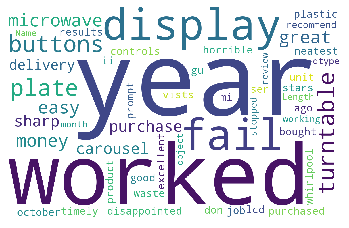

In [62]:
# 星级高的
wordcloud = WordCloud(
        background_color="white", #设置背景为白色，默认为黑色
        width=1500,              #设置图片的宽度
        height=960,              #设置图片的高度
        margin=10               #设置图片的边缘
        ).generate(str(df.loc[df['helpful_votes'] == 0, 'review']))
plt.imshow(wordcloud)
plt.axis("off")

wordcloud.to_file("hairdryer_unhelpful.png")

In [63]:
# 星级和评论的相关系数
df[['review_sentiment', 'star_rating', 'helpful_votes']].corr()

,review_sentiment,star_rating,helpful_votes
review_sentiment,1.000000,0.494463,-0.032734
star_rating,0.494463,1.000000,-0.222532
helpful_votes,-0.032734,-0.222532,1.000000


In [64]:
df.loc[df['verified_purchase'] == 'Y', 'verified_purchase'] = 1
df.loc[df['verified_purchase'] == 'N', 'verified_purchase'] = 0

In [65]:
df[['review_sentiment', 'star_rating', 'helpful_votes', 'verified_purchase']].corr()

,review_sentiment,star_rating,helpful_votes
review_sentiment,1.000000,0.494463,-0.032734
star_rating,0.494463,1.000000,-0.222532
helpful_votes,-0.032734,-0.222532,1.000000


In [66]:
df.verified_purchase.value_counts()

1    1089
0     519
y       6
n       1
Name: verified_purchase, dtype: int64